In [12]:
import numpy as np
import plot_functions as pf
import utilities2 as ut2
import brom_functions as bf

### Methods 2 - the biogeochemical model

The biogeochemical model contains the following state variables: autotrophs,
$\text{Phy}\ \lbrack\text{mg C m}^{- 3}\rbrack$; heterotrophs,
$\text{Het}\ \lbrack\text{mg C m}^{- 3}\rbrack$;
$\text{NH}_{4}^{+}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{NO}_{2}^{-}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{NO}_{3}^{-}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{Si}\ \lbrack\text{mM Si m}^{- 3}\rbrack$;
$\text{PO}_{4}^{3 -}\ \lbrack\text{mM P m}^{- 3}\rbrack$;
$O_{2}\ \lbrack\text{mM O}_{2}\ m^{- 3}\rbrack$;
$\text{SO}_{4}^{2 -}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$S_{2}O_{3}^{2 -}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$S^{0}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$H_{2}S\ \lbrack\text{mM S m}^{- 3}\rbrack$; dissolved inorganic
carbon, $\text{DIC}\ \lbrack\text{mM C m}^{- 3}\rbrack$; particulate
OM ($\text{POM}\ \lbrack\text{mg C m}^{- 3}\rbrack$) ; dissolved OM
($\text{DOM}\ \lbrack\text{mg C m}^{- 3}\rbrack$);
$\text{TA}\ \lbrack\text{mM}m^{- 3}\rbrack$. $P\text{OM}$ and
$D\text{OM}$ have a Redfield stoichiometry of $106C:16N:1P$.

#### Phototrophic producers

Phototrophic producers' growth $\text{Phy}_{\text{growth}} = \mu \cdot \lbrack\text{Phy}\rbrack$ is parametrized according to the empirical equation that describes the phytoplankton daily specific growth rate $\mu\ \lbrack d^{- 1}\rbrack$ as a function of the specific photosynthetic rate of biomass
$P^{B}\ \lbrack{mg\ C\ (mg\ Chl\ a\ d)}^{- 1}\rbrack$ and the $\frac{\text{Chl a}}{C}$ ratio $\lbrack{mg\ Chl\ a\ (mg\ C)}^{- 1}\rbrack$ (Cloern et al., 1995):

$\mu = 0.85P^{B}\frac{\text{Chl a}}{C} - 0.015$,

$P^{B} = Dp_{m}^{B}(1 - \exp\frac{I_{t}\alpha}{p_{m}^{B}})$,

$\frac{\text{Chl a}}{C} = 0.003 + 0.0154e^{0.050T}e^{- 0.059I}\tau$.

Here, $D$ is the photoperiod $\lbrack h\rbrack$ , calculated according to (Fennel and Neumann, 2014),
$p_{m}^{B}$ is the maximum hourly rate of photosynthesis normalized to chlorophyll biomass $\lbrack\text{mg}\ C\ (\text{mg}\ \text{Chl a}\ h)^{- 1}\rbrack$,
$I_{t}$ is the instantaneous photosynthetically active radiation ($\text{PAR}$) $\lbrack\mu\text{M quanta m}^{- 2}\ s^{- 1}\rbrack$,
and $\alpha$ defines photosynthetic efficiency at low irradiance $\lbrack\text{mg}\ C\ (\text{mg}\ \text{Chl a}\ h)^{- 1}\ (\mu M\ \text{quanta}\ m^{- 2}\ s^{- 1})^{- 1}\rbrack$.
$T$ is the temperature $\lbrack^{\circ}C\rbrack$,
$I$ is the daily irradiance $\lbrack\text{M quanta m}^{- 2}\ d^{- 1}\rbrack$,
and $\tau$ is the nutrient-limited growth rate $\lbrack d^{- 1}\rbrack$.
$\tau = \tau_{N}\tau_{\text{Si}}\tau_{PO_{4}^{3 -}}$ where 
$\tau_{N}$ is the nitrogen-limited growth rate,
$\tau_{\text{Si}}$ is the silicon-limited growth rate,
and $\tau_{P}$ is the phosphorus-limited growth rate: $\tau_{N} = \tau_{NH_{4}^{+}} + \tau_{NO_{x}}$,
$\tau_{NH_{4}^{+}} = f_{r}(Ks_{NH_{4}^{+}},\lbrack$NH$_{4}^{+}\rbrack)$,
$\tau_{NO_{x}} = f_{r}(Ks_{NO_{x}},\lbrack\text{NO}_{2}^{-}\rbrack + \lbrack\text{NO}_{3}^{-}\rbrack) \cdot f_{i} (Ks_{NH_{4}^{+}},\lbrack\text{NH}_{4}^{+}\rbrack)$;
$\tau_{\text{Si}} = f_{r}(Ks_{\text{Si}},\lbrack$Si$\rbrack)$;
$\tau_{PO_{4}^{3 -}} = f_{r}(Ks_{PO_{4}^{3 -}},\lbrack$PO$_{4}^{3 -}\rbrack)$.
$f_{r}$ and $f_{i}$ are the sigmoid type functional response and inhibitor function, respectively, of the following forms:
$f_{r}(Ks_{R},R) = \frac{R^{2}}{Ks_{R}^{2} + R^{2}}$ and
$f_{i}(Ks_{R},R) = \frac{Ks_{R}^{2}}{Ks_{R}^{2} + R^{2}}$ where
R is the limiting or inhibiting resource concentration and $Ks_{R}$ is the corresponding half-saturation constant.
Therefore, for example in case of high availability of ammonium
($\lbrack\text{NH}_{4}^{+}\rbrack > > Ks_{NH_{4}^{+}}$),
$\tau_{NH_{4}^{+}}$ tends to converge to a value of one while the nitrate and nitrite limiting term $\tau_{NO_{x}}$ inhibited by ammonium tends to converge to a value of zero.

For example there is a sigmoid type functional response function:

In [13]:
def sigmoid_powered(ks, r):
    """ks - half-saturation constant
       r  - limiting resource"""
    return np.power(r, 2)/(np.power(ks, 2)+np.power(r, 2))

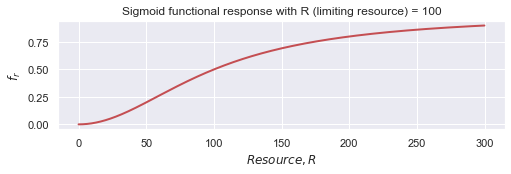

In [14]:
resource = np.arange(0, 300, 0.1)
pf.plot_range('$Resource, R$', '$f_r$', 'Sigmoid functional response with R (limiting resource) = 100', resource, sigmoid_powered(100, resource))

The sygmoid type functional response function returns values close to 1 when the resource values are much higher then a half-saturation constant, it equals 0.5 when the resouce value matches a half-saturation constant value, and tends to zero when the resource values are much less then a half-saturation constant.
Thus using this function we can regulate the limitation of autotrophs' growth by nutrients.

Get some data of the averaged year and check how functional responses and inhibitors would work together.
Here we use the data of the averaged year to calculate ammonium $\tau_{NH_{4}^{+}}$, nitrates $\tau_{NO_{x}}$ and a resulting nitrogen $\tau_{N}$ limiters during a year with the half-saturation constants $Ks_{NH_{4}^{+}} = 7$ $Ks_{NO_{x}}=15$:

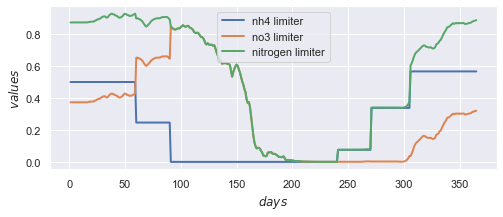

In [15]:
par, temperature, no3, nh4, po4, si, irradiance = ut2.get_data() # get data
nh4_limiter = bf.phy_nh4_limiter(knh4_lim=7, nh4=nh4) # the ammonium limiter with a half-saturation constant = 7
no3_limiter = bf.phy_no3_limiter(knox_lim=15, knh4_lim=7, no3=no3, no2=0, nh4=nh4) # the no3 limiter
pf.plot_year_multi((nh4_limiter, 'nh4 limiter'),(no3_limiter, 'no3 limiter'),(no3_limiter+nh4_limiter, 'nitrogen limiter'))

In [16]:
ChlCratio = bf.ChlCratio(temperature, irradiance, no3_limiter+nh4_limiter)
#pf.plot_year_multi((ChlCratio, 'Chl to C ratio'))

In [17]:
PhyBioRate = bf.phy_biorate(D=bf.photoperiod2(55), pbm=3, alpha=0.09, I=par)
#pf.plot_year_multi((PhyBioRate, 'Autotrophs biomass specific photosyntethic rate'))

In [18]:
def phy_daily_growth(phy_biorate, ChlCratio):
    """
    Coefficiens inside evaluate respiration;
    biorate is the daily rate of photosynthesis, [mg C (mg Chl a d)-1]
    """
    answer = 0.85*phy_biorate*ChlCratio-0.015

    return answer

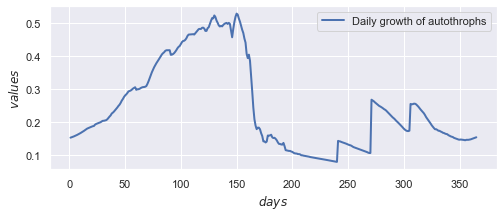

In [19]:
daily_growth = phy_daily_growth(PhyBioRate, ChlCratio)
pf.plot_year_multi((daily_growth, 'Daily growth of autothrophs'))

The phototrophic producers excretion is parametrized as
$\text{Phy}_{\text{excrete}} = K_{phy\_ excrete} \cdot \lbrack\text{Phy}\rbrack$
and the phototrophic producers mortality as
$\text{Phy}_{\text{mortality}} = K_{phy\_ mortality} \cdot \lbrack\text{Phy}\rbrack \cdot \lbrack\text{Phy}\rbrack$
where $K_{phy\_ excrete}$ is the phytoplankton excretion coefficient and
$K_{phy\_ mortality}$ is the phytoplankton mortality coefficient.

#### Heterotrophs

The heterotroph growth parametrization is based on the feeding of
heterotrophs on $\text{Phy}$ and $\text{POM}$ following (Yakushev et
al., 2007) approach, where the carnivore feeding rate depends on the
prey to predator ratio:

$\text{Het}_{grazing\_ phy} = K_{het\_ phy} \cdot f_{r}(Ks_{het\_ phy\_ ratio},\frac{\lbrack Phy\rbrack}{\lbrack Het\rbrack}) \cdot \lbrack\text{Het}\rbrack$,

$\text{Het}_{grazing\_ pom} = K_{het\_ pom} \cdot f_{r}(Ks_{het\_ pom\_ ratio},\frac{\lbrack POM\rbrack}{\lbrack Het\rbrack}) \cdot \lbrack\text{Het}\rbrack$.

Here, $K_{het\_ phy}$ and $K_{het\_ pom}$ are the coefficients for the
feeding of heterotrophs on $\text{Phy}$ and $\text{POM}$, respectively.
$Ks_{het\_ phy\_ ratio}$ and $Ks_{het\_ pom\_ ratio}$ are the
half-saturation constants which determine the prey to predator ratio
where the consumption rate attains 50$\%$ of its maximal value. $f_{r}$
is the sigmoid type functional response.

Heterotroph biomass loss consists of respiration and mortality parts:

$\text{Het}_{\text{respiration}} = K_{het\_ respiration} \cdot f_{r\_ hyperbolic}(Ks_{het\_ oxygen},\lbrack O_{2}\rbrack) \cdot \lbrack\text{Het}\rbrack$,

$\text{Het}_{\text{mortality}} = (K_{het\_ mortality} + f_{i\_ hyperbolic}(Ks_{het\_ oxygen},\lbrack O_{2}\rbrack) \cdot (1 - K_{het\_ mortality})) \cdot \lbrack\text{Het}\rbrack$.

Here $f_{r\_ hyperbolic}(Ks_{R},R) = 0.5 + 0.5 \cdot \tanh(R - Ks_{R})$
is the sigmoid hyperbolic type functional response and
$f_{i\_ hyperbolic}(Ks_{R},R) = 0.5 - 0.5 \cdot \tanh(R - Ks_{R})$ is
the sigmoid hyperbolic type inhibitor function where $R$ is the limiting
or inhibiting resource concentration and $Ks_{R}$ is the corresponding
half-saturation constant as introduced previously. Comparing with the
functions $f_{r}$ and $f_{i}$, $f_{r\_ hyperbolic}$ and
$f_{i\_ hyperbolic}$ provide a steeper gradient with the resource
concentration (R) changing. $K_{het\_ respiration}$ and
$K_{het\_ mortality}$ are the coefficients of heterotroph respiration
and mortality, respectively. Therefore, with sufficient oxygen
concentrations ($\lbrack O_{2}\rbrack > Ks_{het\_ oxygen}$), respiration
and mortality of heterotrophs depend on the corresponding coefficients
$K_{het\_ respiration}$ and $K_{het\_ mortality}$, otherwise respiration
tends to converge to a value of zero and mortality tends to converge to
a value of the heterotroph biomass $\lbrack Het\rbrack$.

#### Organic matter degradation

OM degradation via oxygen respiration, denitrification, and sulfate
reduction is parametrized. Also, an autolysis process is introduced as a
first order reaction
$\text{OM}_{\text{autolysis}} = K_{pom\_ dom} \cdot \lbrack\text{POM}\rbrack$.
Here, for the sake of simplicity we represent OM as $\text{CH}_{2}O$
while in the model it is assumed to have the Redfield stoichiometry
mentioned above. The OM oxygen respiration
($\text{CH}_{2}O + O_{2} \rightarrow \text{CO}_{2} + H_{2}O$) is
parametrized as functions:

$K_{om\_ respiration} = f_{r}(Ks_{O_{2}},\lbrack O_{2}\rbrack) \cdot \tau_{10}(T,q_{10},T_{\text{ref}})$,

$\text{DOM}_{O_{2}\text{oxidation}} = K_{O_{2}dom\_ oxidation} \cdot K_{om_{\text{respiration}}} \cdot \lbrack\text{DOM}\rbrack$,

$\text{POM}_{O_{2}\text{oxidation}} = K_{O_{2}pom\_ oxidation} \cdot K_{om_{\text{respiration}}} \cdot \lbrack\text{POM}\rbrack$.

Here $K_{O_{2}dom\_ oxidation}$, $K_{O_{2}pom\_ oxidation}$ are the
rates of the corresponding processes, $f_{r}$ is the sigmoid type
functional response (see section 5.1) with the half-saturation constant
$Ks_{O_{2}}$, and
$\tau_{10}(T,q_{10},T_{\text{ref}}) = \exp(\frac{T - T_{\text{ref}}}{10} \cdot \ln q_{10})$
being the reaction rate modulator (Soetaert and Herman, 2009) where $T$
is temperature, $q_{10}$ is the q10 factor of a rate increase for every
temperature increase by 10 $^{\circ}C$, and $T_{\text{ref}}$ is
reference temperature at which $\tau_{10} = 1$. Therefore, these
processes rates are the first order temperature dependent reactions
which are not about equal zero when and where approximately
$\lbrack O_{2}\rbrack > Ks_{\text{oxygen}}$.

The OM denitrification is split in two stages, oxidation with nitrates
on the first and oxidation with nitrites on the second stage. The first
stage
($0.5\text{CH}_{2}O + \text{NO}_{3}^{-} \rightarrow \text{NO}_{2}^{-} + 0.5H_{2}O + 0.5\text{CO}_{2}$)
is:

$K_{om\_ denitrification1} = f_{r}(Ks_{NO_{3}^{-}},\lbrack\text{NO}_{3}^{-}\rbrack) \cdot f_{i\_ hyperbolic}(Ks_{O_{2}\text{forN}O_{3}^{-}},\lbrack O_{2}\rbrack)$,

$\text{DOM}_{NO_{3}^{-}\text{oxidation}} = K_{NO_{3}^{-}dom\_ oxidation} \cdot K_{om_{denitrification1}} \cdot \lbrack\text{DOM}\rbrack$,

$\text{POM}_{NO_{3}^{-}\text{oxidation}} = K_{NO_{3}^{-}pom\_ oxidation} \cdot K_{om_{denitrification1}} \cdot \left\lbrack \text{POM} \right\rbrack$.

The second stage
($0.75\text{CH}_{2}O + H^{+} + \text{NO}_{2}^{-} \rightarrow 0.5N_{2} + 1.25H_{2}O + 0.75\text{CO}_{2}$)
is:

$K_{om\_ denitrification2} = f_{r}(Ks_{NO_{2}^{-}},\lbrack\text{NO}_{2}^{-}\rbrack) \cdot f_{i\_ hyperbolic}(Ks_{O_{2}\text{forN}O_{3}^{-}},\lbrack O_{2}\rbrack) \cdot f_{i\_ hyperbolic}(Ks_{NO_{3}^{-}},\lbrack\text{NO}_{3}^{-}\rbrack)$,

$\text{DOM}_{NO_{2}^{-}\text{oxidation}} = K_{NO_{2}^{-}dom\_ oxidation} \cdot K_{om_{denitrification2}} \cdot \lbrack\text{DOM}\rbrack$,

$\text{POM}_{NO_{2}^{-}\text{oxidation}} = K_{NO_{2}^{-}pom\_ oxidation} \cdot K_{om_{denitrification2}} \cdot \lbrack\text{POM}\rbrack$.

Here again $K_{NO_{3}^{-}dom\_ oxidation}$,
$K_{NO_{3}^{-}pom\_ oxidation}$, $K_{NO_{2}^{-}dom\_ oxidation}$,
$K_{NO_{2}^{-}pom\_ oxidation}$ are the process rates, $f_{r}$ is the
sigmoid type functional response, and $f_{i\_ hyperbolic}$ is the
sigmoid hyperbolic type inhibitor function. $Ks_{NO_{3}^{-}}$,
$Ks_{NO_{2}^{-}}$, and $Ks_{O_{2}\text{forN}O_{3}^{-}}$ are the
respective half-saturation constants. Therefore, the processes for
example of the first stage of denitrification are inhibited in presence
of oxygen and occur when and where approximately
$\lbrack\text{NO}_{3}^{-}\rbrack > Ks_{NO_{3}^{-}}$.

The $\text{OM\ sulfate}$ reduction
($2\text{CH}_{2}O + \text{SO}_{4}^{2 -} \rightarrow H_{2}S + 2\text{HCO}_{3}^{-}$)
is parameterized as functions:

$K_{om\_ reduction} = f_{r}(Ks_{SO_{4}^{2 -}},\lbrack\text{SO}_{4}^{2 -}\rbrack) \cdot \tau_{10}(T,q_{10},T_{\text{ref}}) \cdot f_{i\_ hyperbolic}(Ks_{O_{2}\text{forS}O_{4}^{2 -}},\lbrack O_{2}\rbrack) \cdot f_{i\_ hyperbolic}(Ks_{NO_{3}\text{forS}O_{4}^{2 -}},\lbrack\text{NO}_{3}^{-}\rbrack)$,

$\text{DOM}_{SO_{4}^{2 -}\text{oxidation}} = K_{SO_{4}^{2 -}dom\_ oxidation} \cdot K_{om_{\text{reduction}}} \cdot \lbrack\text{DOM}\rbrack$,

$\text{POM}_{SO_{4}^{2 -}\text{oxidation}} = K_{SO_{4}^{2 -}pom\_ oxidation} \cdot K_{om_{\text{reduction}}} \cdot \lbrack\text{POM}\rbrack$.

$K_{SO_{4}^{2 -}dom\_ oxidation}$, $K_{SO_{4}^{2 -}pom\_ oxidation}$ are
the process rates. Sulfate reduction rates are inhibited in the presence
of more favorable electron acceptors (O$_{2}$ or/and NO$_{3}^{-}$).


#### Nitrogen cycle

Apart from denitrification described previously the biogeochemical model
contains nitrification implemented as a two-step process and anammox.
The first stage of nitrification
($\text{NH}_{4}^{+} + \frac{3}{2}O_{2} \rightarrow \text{NO}_{2}^{-} + 2H^{+} + H_{2}O$):

$N_{nitrification1} = K_{n1} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{forN}},\lbrack O_{2}\rbrack) \cdot \lbrack\text{NH}_{4}^{+}\rbrack$.

The second stage of nitrification
($\text{NO}_{2}^{-} + \frac{1}{2}O_{2} \rightarrow \text{NO}_{3}^{-}$):

$N_{nitrification2} = K_{n2} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{forN}},\lbrack O_{2}\rbrack) \cdot \lbrack\text{NO}_{2}^{-}\rbrack$.

Anammox
($\text{NO}_{2}^{-} + \text{NH}_{4}^{+} \rightarrow N_{2} + 2H_{2}O$):

$N_{\text{anammox}} = K_{\text{anammox}} \cdot f_{i\_ hyperbolic}(Ks_{O_{2}\text{forN}O_{3}},\lbrack O_{2}\rbrack) \cdot \lbrack\text{NH}_{4}^{+}\rbrack \cdot \lbrack\text{NO}_{2}^{-}\rbrack$.

Here $K_{n1}$, $K_{n2}$, and $K_{\text{anammox}}$ are the reaction
rates.

#### Sulfur cycle

Sulfur cycle reactions were implemented according to (Yakushev et al.,
2017) as the second order reactions (except disproportionation which is
the first order reaction) with adding functional responses to yield
better sustainability. $S^{0}$ disproportionation
($4S^{0} + 3H_{2}O \rightarrow 2H_{2}S + S_{2}O_{3}^{2 -} + 2H^{+}$):

$S_{\text{disproportionation}}^{0} = K_{S\_ disp} \cdot \lbrack S^{0}\rbrack$.

$H_{2}S$ oxidation with $O_{2}$
($2H_{2}S + O_{2} \rightarrow 2S^{0} + 2H_{2}O$ ):

$H_{2}S_{O_{2}\text{oxidation}} = K_{H_{2}\text{Swith}O_{2}} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{forS}},\lbrack O_{2}\rbrack) \cdot f_{r\_ hyperbolic}(Ks_{H_{2}\text{SforS}},\lbrack H_{2}S\rbrack) \cdot \lbrack H_{2}S\rbrack \cdot \lbrack O_{2}\rbrack$.

$S^{0}$ oxidation with $O_{2}$
($2S^{0} + O_{2} + H_{2}O \rightarrow S_{2}O_{3}^{2 -} + 2H^{+}$):

$S_{O_{2}\text{oxidation}}^{0} = K_{S^{0}\text{Swith}O_{2}} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{forS}},\lbrack O_{2}\rbrack) \cdot \lbrack S^{0}\rbrack \cdot \lbrack O_{2}\rbrack$.

$S_{2}O_{3}^{2 -}$ oxidation with $O_{2}$
($S_{2}O_{3}^{2 -} + 2O_{2} + 2\text{OH}^{-} \rightarrow 2\text{SO}_{4}^{2 -} + H_{2}O$):

$S_{2}O_{3\_ O_{2}\text{oxidation}}^{2 -} = K_{S_{2}O_{3}^{2 -}\text{with}O_{2}} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{forS}},\lbrack O_{2}\rbrack) \cdot \lbrack S_{2}O_{3}^{2 -}\rbrack \cdot \lbrack O_{2}\rbrack$.

Thiodenitrification
($5H_{2}S + 8\text{NO}_{3}^{-} + 2\text{OH}^{-} \rightarrow 5\text{SO}_{4}^{2 -} + 4N_{2} + 6H_{2}O$):

$H_{2}S_{NO_{3}^{-}\text{oxidation}} = K_{H_{2}\text{SwithN}O_{3}^{-}} \cdot f_{r\_ hyperbolic}(Ks_{NO_{3}^{-}\text{forS}},\lbrack\text{NO}_{3}^{-}\rbrack) \cdot f_{r\_ hyperbolic}(Ks_{H_{2}\text{SforS}},\lbrack H_{2}S\rbrack) \cdot \lbrack H_{2}S\rbrack \cdot \lbrack\text{NO}_{3}^{-}\rbrack$.

$S^{0}$ oxidation with $\text{NO}_{3}^{-}$
($4S^{0} + 3\text{NO}_{3}^{-} + 7H_{2}O \rightarrow 4\text{SO}_{4}^{2 -} + 3\text{NH}_{4}^{+} + 2H^{+}$):

$S_{NO_{3}^{-}\text{oxidation}}^{0} = K_{S^{0}\text{SwithN}O_{3}^{-}} \cdot f_{r\_ hyperbolic}(Ks_{NO_{3}^{-}\text{forS}},\lbrack\text{NO}_{3}^{-}\rbrack) \cdot \lbrack S^{0}\rbrack \cdot \lbrack\text{NO}_{3}^{-}\rbrack$.

$S_{2}O_{3}^{2 -}$ oxidation with $\text{NO}_{3}^{-}$
($S_{2}O_{3}^{2 -} + \text{NO}_{3}^{-} + 2H_{2}O \rightarrow 2\text{SO}_{4}^{2 -} + \text{NH}_{4}^{+}$):

$S_{2}O_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -} = K_{S_{2}O_{3}^{2 -}\text{withN}O_{3}^{-}} \cdot f_{r\_ hyperbolic}(Ks_{NO_{3}^{-}\text{forS}},\lbrack\text{NO}_{3}^{-}\rbrack) \cdot \lbrack S_{2}O_{3}^{2 -}\rbrack \cdot \lbrack\text{NO}_{3}^{-}\rbrack$


#### Mass balance equations

The resulting change of concentration of each state variable is a sum of
the relevant processes. We introduce some new notations:
$\text{DOM}_{N\_ oxidation} = \text{DOM}_{NO_{3}^{-}\text{oxidation}} + \text{DOM}_{NO_{2}^{-}\text{oxidation}}$,
$\text{POM}_{N\_ oxidation} = \text{POM}_{NO_{3}^{-}\text{oxidation}} + \text{POM}_{NO_{2}^{-}\text{oxidation}}$
and
$N_{denitrification1} = 2 \cdot (\text{DOM}_{NO_{3}^{-}\text{oxidation}} + \text{POM}_{NO_{3}^{-}\text{oxidation}})$,
$N_{denitrification2} = \frac{4}{3} \cdot (\text{DOM}_{NO_{2}^{-}\text{oxidation}} + \text{POM}_{NO_{2}^{-}\text{oxidation}})$.
The introduction of the coefficients is necessary due to the
stoichiometry mentioned in the section 5.3.

Below we will mark with superscript $'$ the processes with
concentrations converted to molar, for example
${Phy’}_{\text{growth}}\ \lbrack\text{mM\:C\:}m^{- 3}\ d^{- 1}\rbrack = \frac{1}{12.011}\text{Phy}_{\text{growth}}\ \lbrack\text{mg\:C\:}m^{- 3}\ d^{- 1}\rbrack$.
Also we will mark with superscript $''$ the processes with
concentrations converted according to the Redfield stoichiometry
(quantity is marked with a respective subscript, carbon to silicon ratio
is 106 to 15), for example
${DOM"}_{\text{N\:}O_{2}\text{oxydation}}\ \lbrack\text{mM\:N\:}m^{- 3}\ d^{- 1}\rbrack = \frac{1}{12.011}\frac{16}{106}\text{DOM}_{O_{2}\text{oxydation}}\ \lbrack\text{mg\:C\:}m^{- 3}\ d^{- 1}\rbrack$.

The consumption of nitrogen species by phototrophic producers depends on
the respective nitrogen-limited growth rate compounds. Recall that
$\tau_{N} = \tau_{NH_{4}^{+}} + \tau_{NO_{x}}$ where $\tau_{N}$ can not
exceed 1 and $\tau_{NO_{x}}$ depends on sum of nitrites and nitrates
(see section 5.1). Therefore, ammonium by phototrophic producers
consumption is
${Phy"}_{NH_{4}^{+}} = {Phy"}_{\text{growth}}\frac{\tau_{NH_{4}^{+}}}{\tau_{N}}$,
nitrite consumption is
${Phy"}_{NO_{2}^{-}} = {Phy"}_{\text{growth}}\frac{\tau_{NO_{x}}}{\tau_{N}}\frac{\lbrack\text{NO}_{2}^{-}\rbrack}{\lbrack\text{NO}_{2}^{-}\rbrack + \lbrack\text{NO}_{3}^{-}\rbrack}$,
and nitrate consumption is
${Phy"}_{NO_{3}^{-}} = {Phy"}_{\text{growth}}\frac{\tau_{NO_{x}}}{\tau_{N}}\frac{\lbrack\text{NO}_{3}^{-}\rbrack}{\lbrack\text{NO}_{2}^{-}\rbrack + \lbrack\text{NO}_{3}^{-}\rbrack}$.

We assume that only a part ($\text{Uz}$) of total OM consumed by
heterotrophs is absorbed. $\text{Hz}$ is the ratio between dissolved and
particulate parts of OM excreted by heterotrophs. Therefore,
$\text{Het}_{grazing\_ raw} = \text{Het}_{grazing\_ phy} + \text{Het}_{grazing\_ pom}$
and the amount of organic matter consumed by heterotrophs is
$\text{Het}_{\text{grazing}} = Uz \cdot \text{Het}_{grazing\_ raw}$.
Corresponding $\text{DOM}$ input is
$\text{Het}_{dom\_ excrete} = \text{Het}_{grazing\_ raw} \cdot (1 - Uz) \cdot Hz$
and $\text{POM}$ input is
$\text{Het}_{pom\_ excrete} = \text{Het}_{grazing\_ raw} \cdot (1 - Uz) \cdot (1 - Hz)$.

Model mass balance equations:

$\delta\lbrack\text{Phy}\rbrack = \text{Phy}_{\text{growth}} - \text{Phy}_{\text{mortality}} - \text{Phy}_{\text{excrete}} - \text{Het}_{grazing\_ phy}$,

$\delta\lbrack\text{Het}\rbrack = \text{Het}_{\text{grazing}} - \text{Het}_{\text{respiration}} - \text{Het}_{\text{mortality}}$,

$\delta\lbrack\text{DOM}\rbrack = \text{OM}_{\text{autolysis}} + \text{Het}_{dom\_ excrete} + \text{Phy}_{\text{excrete}} - \text{DOM}_{O_{2}\text{oxidation}} - \text{DOM}_{N\_ oxidation} - \text{DOM}_{SO_{4}\text{oxidation}}$,

$\delta\lbrack\text{POM}\rbrack = \text{Phy}_{\text{mortality}} + \text{Het}_{\text{mortality}} + \text{Het}_{pom\_ excrete} - \text{OM}_{\text{autolysis}} - \text{Het}_{grazing\_ pom} - \text{POM}_{O_{2}\text{oxidation}} - \text{POM}_{N\_ oxidation} - \text{POM}_{SO_{4}\text{oxidation}}$,

$\delta\lbrack\text{DIC}\rbrack = {Het’}_{\text{respiration}} + {DOM’}_{O_{2}\text{oxidation}} + {POM’}_{O_{2}\text{oxidation}} + {DOM’}_{N\_ oxidation} + {POM’}_{N\_ oxidation} + {DOM’}_{SO_{4}\text{oxidation}} + {POM’}_{SO_{4}\text{oxidation}} - {Phy’}_{\text{growth}}$,

$\delta\lbrack O_{2}\rbrack = {Phy’}_{\text{growth}} - {Het’}_{\text{respiration}} - {DOM’}_{O_{2}\text{oxidation}} - {POM’}_{O_{2}\text{oxidation}} - \frac{3}{2}N_{nitrification1} - \frac{1}{2}N_{nitrification2} - \frac{1}{2}H_{2}S_{O_{2}\text{oxidation}} - \frac{1}{2}S_{O_{2}\text{oxidation}}^{0} - 2S_{2}O_{3\_ O_{2}\text{oxidation}}^{2 -}$,

$\delta\lbrack\text{NH}_{4}^{+}\rbrack = {Het"}_{\text{N\:respiration}} + {DOM"}_{\text{N\:}O_{2}\text{oxydation}} + {POM"}_{\text{N\:}O_{2}\text{oxydation}} + {DOM"}_{N\ N\_ oxydation} + {POM"}_{N\ N\_ oxydation} + {DOM"}_{\text{N\:S}O_{4}\text{oxydation}} + {POM"}_{\text{N\:S}O_{4}\text{oxydation}} + \frac{3}{4}S_{NO_{3}^{-}\text{oxidation}}^{0} + S_{2}O_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -} - N_{nitrification1} - N_{\text{anammox}} - {Phy"}_{NH_{4}^{+}}$,

$\delta\lbrack\text{NO}_{2}^{-}\rbrack = N_{nitrification1} + N_{denitrification1} - N_{nitrification2} - N_{denitrification2} - N_{\text{anammox}} - {Phy"}_{NO_{2}^{-}}$,

$\delta\lbrack\text{NO}_{3}^{-}\rbrack = N_{nitrification2} - N_{denitrification1} - {Phy"}_{NO_{3}^{-}} - \frac{8}{5}H_{2}S_{NO_{3}^{-}\text{oxidation}} - \frac{3}{4}S_{NO_{3}^{-}\text{oxidation}}^{0} - S_{2}O_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -}$,

$\delta\lbrack\text{PO}_{4}^{3 -}\rbrack = {Het"}_{\text{P\:respiration}} + {DOM"}_{\text{P\:}O_{2}\text{oxydation}} + {POM"}_{\text{P\:}O_{2}\text{oxydation}} + {DOM"}_{P\ N\_ oxydation} + {POM"}_{P\ N\_ oxydation} + {DOM"}_{\text{P\:S}O_{4}\text{oxydation}} + {POM"}_{\text{P\:S}O_{4}\text{oxydation}} - {Phy"}_{\text{P\:growth}}$,

$\delta\lbrack\text{Si}\rbrack = {Het"}_{\text{Si\:respiration}} + {DOM"}_{\text{Si\:}O_{2}\text{oxydation}} + {POM"}_{\text{Si\:}O_{2}\text{oxydation}} + {DOM"}_{Si\ N\_ oxydation} + {POM"}_{Si\ N\_ oxydation} + {DOM"}_{\text{Si\:S}O_{4}\text{oxydation}} + {POM"}_{\text{Si\:S}O_{4}\text{oxydation}} - {Phy"}_{\text{Si\:growth}}$,

$\delta\lbrack\text{SO}_{4}^{2 -}\rbrack = 2S_{2}O_{3\_ O_{2}\text{oxidation}}^{2 -} + H_{2}S_{NO_{3}^{-}\text{oxidation}} + S_{NO_{3}^{-}\text{oxidation}}^{0} + 2S_{2}O_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -} - \frac{1}{2}{DOM’}_{SO_{4}\text{oxidation}} - \frac{1}{2}{POM’}_{SO_{4}\text{oxidation}}$,

$\delta\lbrack S_{2}O_{3}^{2 -}\rbrack = \frac{1}{4}S_{\text{disproportionation}}^{0} + \frac{1}{2}S_{O_{2}\text{oxidation}}^{0} - S_{2}O_{3\_ O_{2}\text{oxidation}}^{2 -} - S_{2}O_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -}$,

$\delta\lbrack S^{0}\rbrack = H_{2}S_{O_{2}\text{oxidation}} - S_{\text{disproportionation}}^{0} - S_{O_{2}\text{oxidation}}^{0} - S_{NO_{3}^{-}\text{oxidation}}^{0}$,

$\delta\lbrack H_{2}S\rbrack = \frac{1}{2}S_{\text{disproportionation}}^{0} + \frac{1}{2}{DOM’}_{SO_{4}\text{oxidation}} + \frac{1}{2}{POM’}_{SO_{4}\text{oxidation}} - H_{2}S_{O_{2}\text{oxidation}} - H_{2}S_{NO_{3}^{-}\text{oxidation}}$,

$\delta\lbrack\text{TA}\rbrack = \delta\lbrack\text{NH}_{4}^{+}\rbrack - \delta\lbrack\text{NO}_{2}^{-}\rbrack - \delta\lbrack\text{NO}_{3}^{-}\rbrack - \delta\lbrack\text{PO}_{4}^{3 -}\rbrack - 2\delta\lbrack\text{SO}_{4}^{2 -}\rbrack$.

We calculate the resulting $\text{TA}$ change as the sum of increments
of ammonium, nitrites, nitrates, phosphates, and sulfates.
